## Problem 1

### a)
$$
\frac{\partial P(x,t)}{\partial t} = \frac{1}{\gamma}\frac{\partial}{\partial x} \left(\frac{\partial U(x)}{\partial x}P(x,t)\right) + \frac{\partial^2}{\partial x^2} \left(D(x)P(x,t)\right)
$$

1. $U(x) = u\cdot x$
2. $P(0,t) = 0$
3. $P(\infty,t) = 0$
4. $P(x,0) = \delta(x-x_0)$
5. $D$ - const

$$
\frac{\partial P(x,t)}{\partial t} = \frac{1}{\gamma}\frac{\partial}{\partial x} \left(u\cdot P(x,t)\right) + D\frac{\partial^2}{\partial x^2} \left(P(x,t)\right)
$$

Applying Fourier transform we'll obtain:

$$
\frac{\partial \hat P(\omega,t)}{\partial t} = \frac{1}{\gamma} \left(i\cdot \omega \cdot u\cdot \hat P(\omega,t)\right) + D\cdot (i\cdot \omega)^2 \left(\hat P(\omega,t)\right)
$$

$$
\frac{\partial \hat P(\omega,t)}{ \hat P(\omega, t)} = \left(\frac{ui\omega}{\gamma} - D\omega^2\right)\partial t
$$

$$
\hat P(\omega, t) = Ce^{\left(\frac{ui\omega}{\gamma} - D\omega^2\right) t}
$$

$$
\hat P(\omega, 0) = \int_{-\infty}^{\infty}\delta(x-x_0)e^{-i\omega x}dx = e^{-i\omega x_0} = C
$$

As a result:

$$
\hat P(\omega, t) = e^{\left(\frac{ui\omega}{\gamma} - D\omega^2\right) t - i\omega x_0}
$$

Using inverse Fourier transform, we can get:

$$
P_+(x,t) = \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{\left(\frac{ui\omega}{\gamma} - D\omega^2\right) t - i\omega x_0 + i\omega x}d\omega = \frac{1}{2\pi} \sqrt{\frac{\pi}{Dt}} e^{-\frac{(\frac{ut}{\gamma}+x-x_0)^2}{4Dt}} = \frac{1}{\sqrt{4\pi D t}}\exp{\left(-\frac{(\frac{ut}{\gamma}+x-x_0)^2}{4Dt}\right)}
$$

To satisfy all boundary conditions consider:

$$
P_-(x,t) = -\frac{1}{\sqrt{4\pi D t}}\exp{\left(-\frac{(-\frac{ut}{\gamma}+x+x_0)^2}{4Dt}\right)}
$$

Then, the solution can be represented as a sum of $P_+$ and $P_-$

### b)

$$
S(t) = \int_0^\infty P(x,t)dx
$$

$$
S(t) = \int_0^\infty \left(P_+(x,t)+P_-(x,t)\right)dx =  \frac{1}{\sqrt{4\pi D t}}\int_0^\infty \exp{\left(-\frac{(\frac{ut}{\gamma}+x-x_0)^2}{4Dt}\right)}dx -\frac{1}{\sqrt{4\pi D t}} \int_0^\infty \exp{\left(-\frac{(-\frac{ut}{\gamma}+x+x_0)^2}{4Dt}\right)}dx = 
$$

Substitute:

$$v = \frac{\frac{ut}{\gamma}+x-x_0}{\sqrt{4Dt}}$$

$$dv = \frac{dx}{\sqrt{4Dt}}$$

$$z = \frac{-\frac{ut}{\gamma}+x+x_0}{\sqrt{4Dt}}$$

$$dz = \frac{dx}{\sqrt{4Dt}}$$

$$
=  \frac{2}{2\sqrt{\pi}}\int\limits_{\frac{\frac{ut}{\gamma}-x_0}{\sqrt{4Dt}}}^\infty e^{-v^2}dv -\frac{2}{2\sqrt{\pi}} \int\limits_{\frac{-\frac{ut}{\gamma}+x_0}{\sqrt{4Dt}}}^\infty e^{-z^2}dz = -\frac{1}{2}\left(\text{erf}(\frac{\frac{ut}{\gamma}-x_0}{\sqrt{4Dt}})-\text{erf}(\frac{-\frac{ut}{\gamma}+x_0}{\sqrt{4Dt}})\right) = \text{erf}(\frac{-\frac{ut}{\gamma}+x_0}{\sqrt{4Dt}})
$$




$$
\phi (t) = -\frac{dS}{dt} = -\int_0^\infty\frac{\partial P}{\partial t}dx = -\int_0^\infty \left(\frac{1}{\gamma}\frac{\partial}{\partial x} \left(u\cdot P(x,t)\right) + D\frac{\partial^2}{\partial x^2} \left(P(x,t)\right)\right)dx = -\left(\frac{uP(x,t)}{\gamma}+D\frac{\partial P}{\partial x}\right) \big |_0^\infty = D\frac{\partial P}{\partial x} \big |_0
$$

$$
\phi(t) = D\frac{\partial P}{\partial x} = \frac{x_0 - \frac{ut}{\gamma}}{\sqrt{4\pi D t^3}}\exp{\left(-\frac{(x_0 - \frac{ut}{\gamma})^2}{4Dt}\right)}
$$


### c)
$$
t \to \infty
$$
$$
\phi(t) \propto \exp{\left(-t\right)}
$$
$$
S(t) \propto \text{exp}(-t)
$$

$$
t \to 0
$$
$$
\phi(t) \propto t^{-\frac{1}{2}}
$$

### d)

$$
A(t) = 1-S(t) = \text{erfc}(\frac{-\frac{ut}{\gamma}+x_0}{\sqrt{4Dt}})
$$

1. $u=0$, $x_0=1$: $A(t) = \text{erfc}(\frac{1}{\sqrt{4Dt}})$
2. $u=\pm 1$, $x_0=1$: $A(t) =\text{erfc}(\frac{\mp\frac{t}{\gamma}+1}{\sqrt{4Dt}})$


In [252]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [253]:
def x_dot(eps,dt,u=1):
    gamma = 1
    kbt = 1
    Gamma = 2 * kbt * gamma
    return -1/gamma * u * dt + 1 / gamma * np.sqrt(Gamma*dt) * eps

def update_x(x0,dt,u):
    eps = np.random.randn(*x0.shape)
    x = x0 + x_dot(eps,dt,u)      
    return x

def calculate_trajectory(x0,n,dt,u):
    x_hist = [x0]
    t = 0
    res = np.zeros((2,n))
    for i in range(1,n):
        x = update_x(x_hist[-1],dt,u)
        res[0,i] = np.sum(x<=0)
        res[1,i] = t
        if np.sum(x<=0)!=0:
            x = x[x>0]
        x_hist.append(x)
        t+=dt  
    fi = np.empty((2,np.sum([res[0,:]!=0]))) 
    fi[0,:] = res[0,:][res[0,:]!=0]
    fi[1,:] = res[1,:][res[0,:]!=0]
    return x_hist,fi

x0 = np.ones(80000)
dt = 0.001
n = 7000

x,res = calculate_trajectory(x0,n,dt,u=1)
    

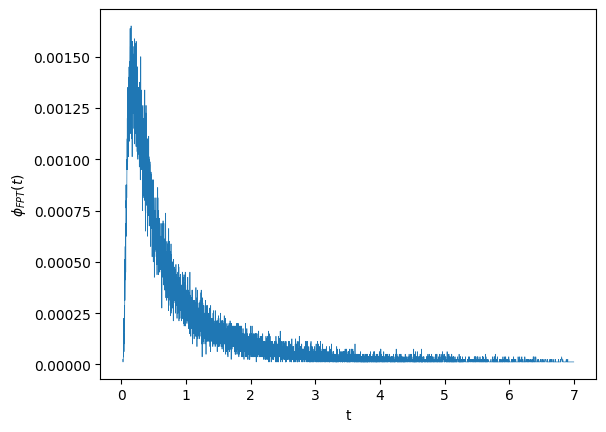

In [254]:
#plt.plot(t,x);
plt.plot(res[1,:],res[0,:]/80000, lw=0.5)
plt.xlabel('t')
plt.ylabel('$\phi_{FPT}(t)$');

In [255]:
y=np.zeros((1,np.shape(res)[1]))
for i in range(1,np.shape(res)[1]):
    y[0,i] = y[0,i-1]+res[0,i]

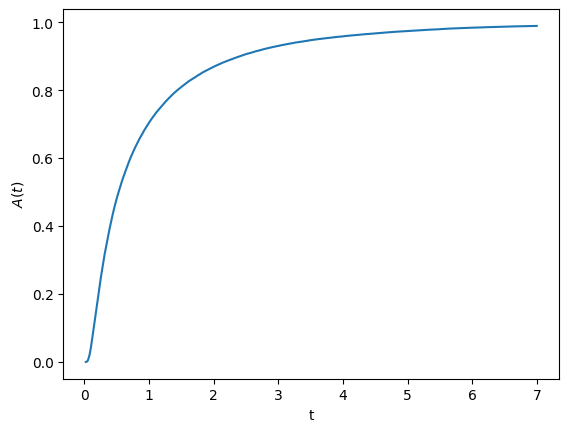

In [256]:
plt.plot(res[1,:],y[0,:]/80000)
plt.xlabel('t')
plt.ylabel('$A(t)$');

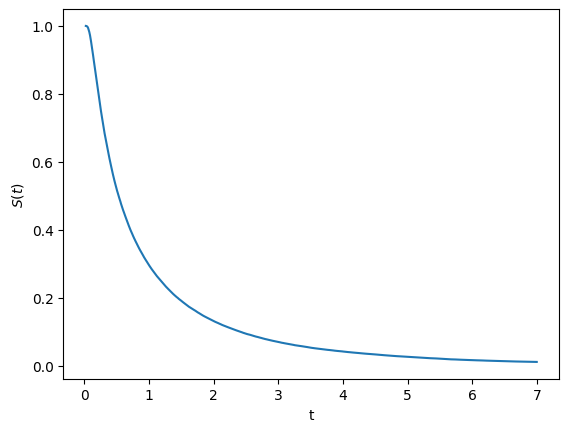

In [257]:
plt.plot(res[1,:],1-y[0,:]/80000)
plt.xlabel('t')
plt.ylabel('$S(t)$');

In [242]:
print('MFPT:', np.sum(res[0,:]*res[1,:])/np.sum(res[0,:]))

MFPT: 0.9233547045813357


## Problem 2

$$
T_{MFPT} = \frac{2\pi\gamma\cdot\text{exp}(\Delta U/kT)}{\left|U^{''}(a)U^{''}(b)\right|^{0.5}}
$$

$$
T_{MFPT} = \frac{2\pi\cdot\text{exp}(U(x_{max})-U(x_{min}))}{2\omega} = \frac{\pi\cdot\text{exp}(\frac{\omega}{8}))}{\omega}
$$

In [243]:
def potential(x,w):
    U = np.zeros(len(x))
    U[(x>=0)&(x<=0.5)] = w*(x[(x>=0)&(x<=0.5)]-0.25)**2
    U[(x > 0.5)&(x<=1)] =-w*(x[(x > 0.5)&(x<=1)]-0.75)**2+w/8
    return U

In [244]:
def get_transrules(y,x,w):
    #y - indexes of x, where particles are located. To get particles' coordinates call x[y]
    kT = 1
    dx = x[1]-x[0]
    U = potential(x,w)
    Un = kT/(dx**2)*np.exp(-(U[y+1]-U[y])/(2*kT))
    Dn = kT/(dx**2)*np.exp((U[y]-U[y-1])/(2*kT))
    return Un, Dn

In [245]:
def timing_probabilities(y,x,w):
    Un,Dn = get_transrules(y,x,w)
    t = -(Un+Dn)**(-1)*np.log(np.random.uniform(size=len(y)))
    Pright = Un/(Un+Dn)
    return t, Pright

In [246]:
def evolution_v2(number,x,w=1):
    #number - number of particles
    #x - lattice: [0,1]
    n = np.where(x==0.25)[0][0]
    y = np.ones(number,dtype=int)*n
    adsorbed = np.zeros(number)
    t_tot = np.zeros(number)
    
    while np.sum(adsorbed)!= number:
        z = y[adsorbed!=1] #taking not adsorbed particles
        t,Pright = timing_probabilities(z,x,w) #getting retention time and probabilities
        t_tot[adsorbed!=1] += t
        X2 = np.random.uniform(size=len(z))
        mask = np.where(adsorbed!=1)[0]
        y[mask[X2<Pright]] += 1 #moving to the right
        y[mask[X2>Pright]] -= 1 #moving to the left
        y[y==0] += 1 #reflecting
        adsorbed[y==len(x)-1]=1 #adsorbtion
    return t_tot

In [254]:
def kramers(w):
    return np.pi/w*np.exp(w/8)

In [257]:
x = np.arange(0,1.05,0.05)
omegas = [10,20,30]
results = []
for w in omegas:
    step = []
    step.append(evolution_v2(10000,x,w).mean())
    step.append(kramers(w))
    results.append(step)

In [265]:
print("MFPT:")
print("Simulation:         ", "Kramers formula:")
print(*results, sep='\n')

MFPT:
Simulation:          Kramers formula:
[0.7962258371592265, 1.0965235793670993]
[1.7070536532343252, 1.9136216764674026]
[4.161920277698094, 4.452797294469548]


The results obtained by simulation tend to be lower than the Kramers' formula. But the general trend of the results is the same

## Problem 3

In steady state $\frac{\partial P(x,t)}{\partial t}=0$

Therefore,

$$
\frac{d^2 P}{d x^2} + 2a(x-\frac{1}{2})\frac{d P}{d x} + 2aP =0
$$

substitute $x-1/2 = u$

$$
\frac{d^2 P}{d x^2} + 2au\frac{d P}{d x} + 2aP =0
$$

$$
\frac{d}{dx}\left(P^{'}+2auP\right)=0
$$

$$
P^{'} +2auP=C
$$

Using Lagrange method  $P(x)=t(x)v(x)$ we can get:

$$
t^{'}v + tv^{'} + 2autv = C
$$

$$
tv^{'} + v(t^{'} + 2aut) = C
$$

$$
t^{'} + 2aut = 0
$$

$$
t = exp\left(-au^2\right)
$$

$$
exp\left(-au^2\right)v^{'}=C
$$

$$
v = \frac{\sqrt{\pi}C\cdot\text{erfi}\left(u\sqrt{a}\right)}{2\sqrt{a}}+C_1
$$

$$
P = \frac{\sqrt{\pi}C\cdot\text{erfi}\left(u\sqrt{a}\right)+2\sqrt{a}C_1}{2\sqrt{a}\cdot\exp\left(au^2\right)}
$$

Using previous substitution $u = x-\frac{1}{2}$

$$
P = \frac{\sqrt{\pi}C\cdot\text{erfi}\left((x-\frac{1}{2})\sqrt{a}\right)+2\sqrt{a}C_1}{2\sqrt{a}\cdot\exp\left(a(x-\frac{1}{2})^2\right)}
$$

### FTCS

In [54]:
def getV(x,a):
    return 2*a*(x-0.5)

In [244]:
def getM(dx,dt,a):
    
    gamma = dt/(dx**2)
    beta = 1 + 2*a*dt - 2* gamma
    x = np.arange(0,1+dx,dx)
    Nx = len(x)-1
    
    main_diag = np.ones(Nx+1)*beta
    main_diag[[0,-1]]=1
    
    upper_diag = np.array([dt*getV(x[i],a)/(2*dx) for i in range(1,Nx)])+gamma
    upper_diag = np.insert(upper_diag,0,0)
    
    lower_diag = np.array([-dt*getV(x[i],a)/(2*dx) for i in range(1,Nx)])+gamma
    lower_diag = np.append(lower_diag,0)
    
    return np.diag(main_diag) + np.diag(upper_diag,1) + np.diag(lower_diag,-1)

In [233]:
def init_cond(dx,sigma=0.001,x0=0.25):
    x = np.arange(0,1+dx,dx)
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-x0)**2)/(sigma**2))

In [265]:
def main(dx,dt,a,Niter):
    M = getM(dx,dt,a)
    P = init_cond(dx)
    for i in range(Niter):
        P = np.dot(M,P)
    return P

Text(0, 0.5, 'P(t)')

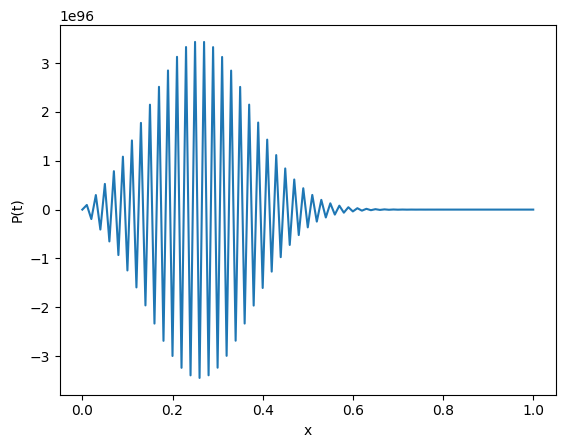

In [268]:
dx=0.01
plt.plot(np.arange(0,1+dx,dx),main(dx=dx,dt=0.0001,a=3,Niter=200))
plt.xlabel('x')
plt.ylabel('P(t)')

### Crank Nicolson

In [258]:
def getM1(dx,dt,a):
    
    gamma = dt/(dx**2)/2
    alpha = 1 - a*dt + gamma
    x = np.arange(0,1+dx,dx)
    Nx = len(x)-1
    
    main_diag = np.ones(Nx+1)*alpha
    main_diag[[0,-1]]=1
    
    upper_diag = np.array([dt*getV(x[i],a)/(4*dx) for i in range(1,Nx)])-gamma
    upper_diag = np.insert(upper_diag,0,0)
    
    lower_diag = np.array([-dt*getV(x[i],a)/(4*dx) for i in range(1,Nx)])-gamma
    lower_diag = np.append(lower_diag,0)
    
    return np.diag(main_diag) + np.diag(upper_diag,1) + np.diag(lower_diag,-1)

In [259]:
def getM2(dx,dt,a):
    
    gamma = dt/(dx**2)/2
    beta = 1 + a*dt - gamma
    x = np.arange(0,1+dx,dx)
    Nx = len(x)-1
    
    main_diag = np.ones(Nx+1)*beta
    main_diag[[0,-1]]=1
    
    upper_diag = np.array([dt*getV(x[i],a)/(4*dx) for i in range(1,Nx)])+gamma
    upper_diag = np.insert(upper_diag,0,0)
    
    lower_diag = np.array([-dt*getV(x[i],a)/(4*dx) for i in range(1,Nx)])+gamma
    lower_diag = np.append(lower_diag,0)
    
    return np.diag(main_diag) + np.diag(upper_diag,1) + np.diag(lower_diag,-1)

In [263]:
def main1(dx,dt,a,Niter):
    M1 = getM1(dx,dt,a)
    M2 = getM2(dx,dt,a)
    P = init_cond(dx)
    for i in range(Niter):
        f = np.dot(M2,P)
        P = np.linalg.solve(M1,f)
    return P

Text(0, 0.5, 'P(t)')

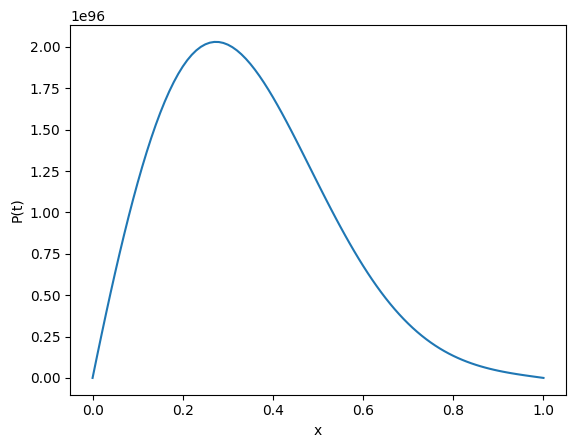

In [269]:
dx=0.01
plt.plot(np.arange(0,1+dx,dx),main1(dx=dx,dt=0.0001,a=3,Niter=200))
plt.xlabel('x')
plt.ylabel('P(t)')